<a href="https://colab.research.google.com/github/AnasIDS/Taxi-Analysis/blob/main/G2M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:

#Adding the spreadsheet to variables.
cap = pd.read_csv("/content/Cab_Data.csv")
city=pd.read_csv("/content/City.csv")
cust=pd.read_csv("/content/Customer_ID.csv")
trans=pd.read_csv("/content/Customer_ID.csv")


In [ ]:
cap.info()
cap.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283412 entries, 0 to 283411
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  283412 non-null  int64  
 1   Date of Travel  283412 non-null  object 
 2   Company         283412 non-null  object 
 3   City            283412 non-null  object 
 4   KM Travelled    283412 non-null  float64
 5   Price Charged   283412 non-null  float64
 6   Cost of Trip    283411 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 15.1+ MB


Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      1
dtype: int64

In [ ]:
cap['Date of Travel']=pd.to_datetime(cap['Date of Travel'])
cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283412 entries, 0 to 283411
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  283412 non-null  int64         
 1   Date of Travel  283412 non-null  datetime64[ns]
 2   Company         283412 non-null  object        
 3   City            283412 non-null  object        
 4   KM Travelled    283412 non-null  float64       
 5   Price Charged   283412 non-null  float64       
 6   Cost of Trip    283411 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 15.1+ MB


<Axes: >

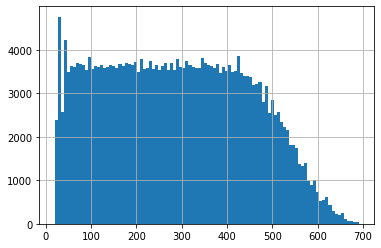

In [ ]:
cap['Cost of Trip'].hist(bins=100)

<Axes: >

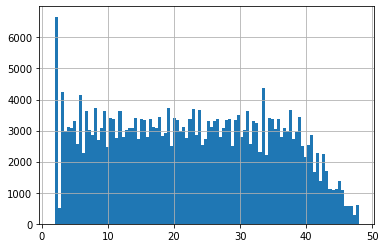

In [ ]:
cap['KM Travelled'].hist(bins=100)

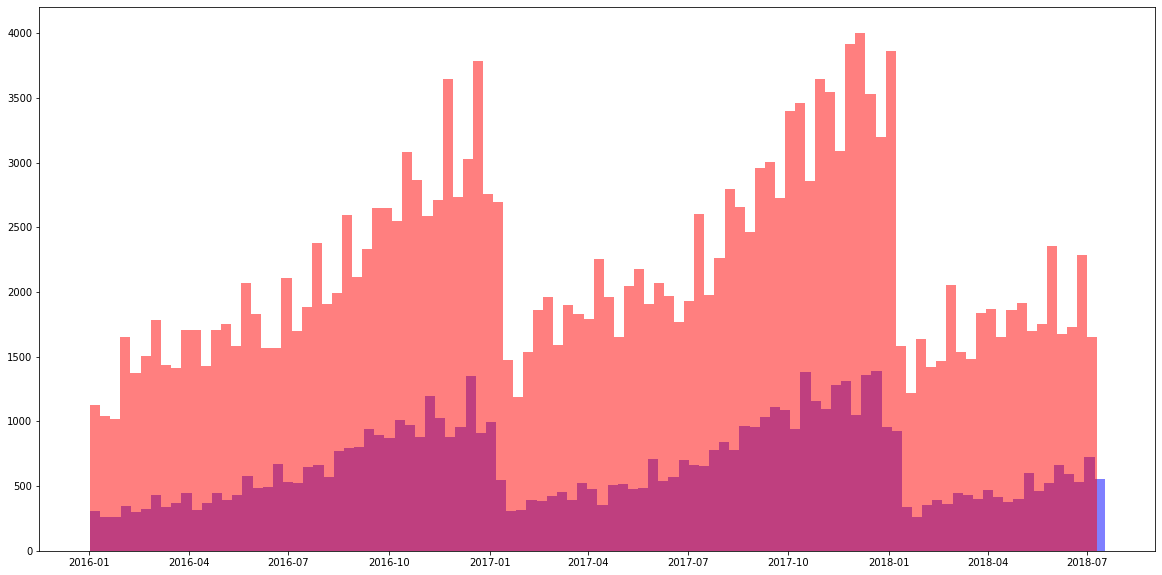

In [ ]:
categories = cap['Company'].unique()
colors=['blue','red']
fig, ax = plt.subplots(figsize=(20,10))
for i, category in enumerate(categories):
    subset = cap[cap['Company'] == category]
    ax.hist(subset['Date of Travel'], bins=100, alpha=0.5, color=colors[i], label=category)

In [ ]:
city.info()
city.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


City          0
Population    0
Users         0
dtype: int64

In [ ]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [ ]:
city['Population'] = city['Population'].str.replace(',', '')
city['Users'] = city['Users'].str.replace(',', '')
city['Pupulation']=city['Population'].astype('int')
city['Users']=city['Users'].astype('int')

AttributeError: ignored

In [ ]:
cust.info()
cust.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [ ]:
trans.info()
trans.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [ ]:
#Switching the Varibales to DataFrames.
Cab_Data_df = pd.DataFrame(Cab_Data)
City_df = pd.DataFrame(City)
Customer_ID_df = pd.DataFrame(Customer_ID)
Transaction_ID_df = pd.DataFrame(Transaction_ID)

#Adding the profit coloumn to the Cabe_Data table.
Cab_Data_df['Profit']=Cab_Data_df['Price Charged']-Cab_Data_df['Cost of Trip']



In [ ]:
#Merging tables in one table.
cab_city_merge = pd.merge(Cab_Data,City,on="City",indicator=True)
merge_transaction = pd.merge(cab_city_merge,Transaction_ID,on='Transaction ID')
merge = pd.merge(merge_transaction,Customer_ID,on='Customer ID')
merge['year'] = pd.DatetimeIndex(merge['Date of Travel']).year
merge['month'] = pd.DatetimeIndex(merge['Date of Travel']).month
merge['week'] =pd.DatetimeIndex(merge['Date of Travel']).week
merge['day'] = pd.DatetimeIndex(merge['Date of Travel']).day


C:\Users\96654\AppData\Local\Temp/ipykernel_13508/1322817856.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merge['week'] =pd.DatetimeIndex(merge['Date of Travel']).week


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame.plot.scatter(x=merge['day'],y=merge['KM Travelled'],ylim=(0,1000))
plt.show()

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(merge['day'],merge['Profit'])

NameError: ignored

In [ ]:

weather = pd.read_csv('C:\\Users\\96654\\Desktop\\WeatherEvents_Jan2016-Dec2021.csv')
weather_df = pd.DataFrame(x)
weather_df2 = weather_df[(pd.to_datetime(weather_df['StartTime(UTC)'])<'1/1/2019')]
print(weather_df2.info())

FileNotFoundError: ignored

  EventId  Type Severity       StartTime(UTC)         EndTime(UTC)  \
0     W-1  Snow    Light  2016-01-06 23:14:00  2016-01-07 00:34:00   
1     W-2  Snow    Light  2016-01-07 04:14:00  2016-01-07 04:54:00   
2     W-3  Snow    Light  2016-01-07 05:54:00  2016-01-07 15:34:00   
3     W-4  Snow    Light  2016-01-08 05:34:00  2016-01-08 05:54:00   
4     W-5  Snow    Light  2016-01-08 13:54:00  2016-01-08 15:54:00   

   Precipitation(in)     TimeZone AirportCode  LocationLat  LocationLng  \
0               0.00  US/Mountain        K04V      38.0972    -106.1689   
1               0.00  US/Mountain        K04V      38.0972    -106.1689   
2               0.03  US/Mountain        K04V      38.0972    -106.1689   
3               0.00  US/Mountain        K04V      38.0972    -106.1689   
4               0.00  US/Mountain        K04V      38.0972    -106.1689   

       City    County State  ZipCode  
0  Saguache  Saguache    CO  81149.0  
1  Saguache  Saguache    CO  81149.0  
2  Saguache

In [ ]:

import matplotlib.pyplot as plt

plt.plot(weather_df2['StartTime(UTC)'],weather_df2['Type'])
